In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [2]:
df_admix_corr = pd.read_csv("results/admix-corr.csv")

In [6]:
df_sldxr = pd.read_excel("https://www.dropbox.com/s/jck2mhjby2ur55j/supp_tables.xlsx?dl=1", sheet_name="shi-sldxr-estimate").dropna()

In [8]:
df_sldxr

,trait (abbrev.),id,NEAS,NEUR,"hg,EAS","hg,EUR",rg
4,Body Mass Index (BMI),bmi,158284,337539,0.161 (0.010),0.207 (0.007),0.804 (0.021)
6,Diastolic Blood Pressure (DBP),diastolic_bp,136615,337539,0.052 (0.008),0.146 (0.007),0.862 (0.059)
7,Estimated Glomerular Filtration Rate (EGFR),egfrckdepi,143658,100125,0.074 (0.008),0.058 (0.007),1.053 (0.063)
9,Hemoglobin A1c (HBA1C),a1c,42790,337539,0.109 (0.022),0.082 (0.006),0.875 (0.083)
10,High Density Lipoprotein (HDL),hdl,70657,337539,0.109 (0.016),0.140 (0.010),0.892 (0.056)
11,Height (HEIGHT),height,151569,337539,0.371 (0.017),0.366 (0.018),0.897 (0.018)
14,Low Density Lipoprotein (LDL),ldl,72866,337539,0.047 (0.015),0.076 (0.009),0.662 (0.105)
16,Mean Corpuscular Hemoglobin (MCH),mean_corp_hgb_conc,108054,337539,0.130 (0.014),0.144 (0.010),0.884 (0.049)
22,Platelet Count (PLT),platelet_cnt,108208,337539,0.157 (0.015),0.214 (0.013),0.879 (0.035)
25,Systolic Blood Pressure (SBP),systolic_bp,136597,337539,0.064 (0.008),0.149 (0.007),0.807 (0.043)


In [10]:
dict_sldxr = {
    row.id : float(row.rg.split(' ')[0]) for _, row in df_sldxr.iterrows()
}
dict_admix = {
    row.trait : row.rg for _, row in df_admix_corr.iterrows() if row.trait in dict_sldxr
}

In [11]:
sldxr_estimate = [dict_sldxr[t] for t in dict_sldxr]
admix_estimate = [dict_admix[t] for t in dict_sldxr]


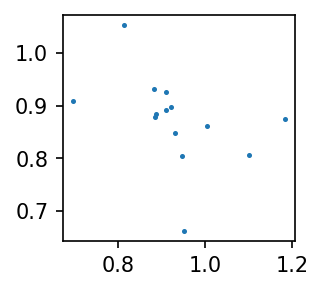

In [16]:
fig, ax = plt.subplots(figsize=(2,2), dpi=150)
ax.scatter(admix_estimate, sldxr_estimate, s=2)

In [12]:
pearsonr(sldxr_estimate, admix_estimate)

(-0.4041788054192995, 0.1517656858159757)